<div align="center">
  <b> <font size="6">Polynomial Regression (Non-Linear fitting)</font> </b>
</div>

<div align="center">
  <b> <font size="4">Let us work on a real dataset with Sci-Kit (SK) Learn </font> </b>
</div>


<div align="center">
  <b> <font size="2"> It is not non-linear regression </font> </b>
</div>

<div>
   <font size="2">I will explain with linear, poly-order 2, poly-order 3, poly-order 20, poly-order 40. <br>  <br> I am not going to split dataset into training and testing set.  <br> <br> I will show you the implementation with whole dataset fitting with the model, SSE, and R_sqaure.  <br> <br> You can split dataset into training and testing set and practice with the code. </font>  
    
</div>

In [1]:
# Import necessary package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 1. Linear Regression

##### Dataset 

In [2]:
# Let us work with sample data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 50)

##### Data visualization

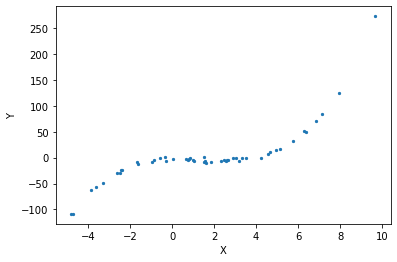

In [3]:
plt.scatter(x,y, s=5)
plt.xlabel("X")
plt.ylabel("Y") 
plt.show()

##### Fitting with simple regression using sklearn

In [4]:
# Fitting and plotting the predicted value
from sklearn.linear_model import LinearRegression
x = x.reshape(-1,1)
 
# Fit the linear model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

##### Predict the output for training input values using the models

In [5]:
y_pred = model.predict(x)

In [6]:
model.coef_

array([12.91501245])

In [7]:
model.intercept_

-18.161443351033988

In [8]:
print("y = mx + b =>   y = ", model.coef_ ,"x +",model.intercept_)

y = mx + b =>   y =  [12.91501245] x + -18.161443351033988


##### Visualizting the prediction performance

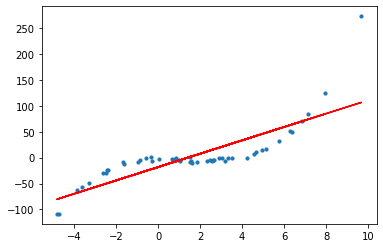

In [9]:
# Plotting
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

##### Calculating SSE

In [10]:
# SSE
sum = 0   
n = len(x)  
for i in range (0,n):   
  diff = y[i] - y_pred[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
SSE_Linear = round(sum,2)
print("Sum of Squared Error (SSE) for Linear model:",SSE_Linear )

Sum of Squared Error (SSE) for Linear model: 50092.13


##### Calculating R_2

In [11]:
# Calculating R-Squred value (goodness of model) using SSE
from sklearn.metrics import r2_score
out = r2_score(y,y_pred)
RS_Linear = round(out,2)*100
print("R-Squred value for Linear model :",RS_Linear,"%")  

R-Squred value for Linear model : 65.0 %


This linear model did not fit well. So, let us try with complicate models (polynomial)

### 2. Polynomial regression (degree 2)

##### Dataset

In [12]:
# Let us work with sample data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 50)

##### Data visualization

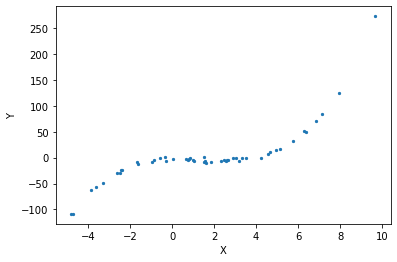

In [13]:
plt.scatter(x,y, s=5)
plt.xlabel("X")
plt.ylabel("Y") 
plt.show()

##### Fitting with polynomial order 2 using sklearn

In [14]:
import operator  
from sklearn.preprocessing import PolynomialFeatures

# To convert the original features into their higher order terms 
x = x.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

# Fit the polynomial model with degree 2
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [15]:
parameters = model.coef_
parameters

array([0.        , 8.88674291, 1.11862126])

In [16]:
print("a x_2 + b x + c => ", round(parameters[2],2)," x_2 +",round(parameters[1],2)," x + ",round(parameters[0],2))

a x_2 + b x + c =>  1.12  x_2 + 8.89  x +  0.0


##### Predict the output for training input values using the models

In [17]:
y_poly_2_pred = model.predict(x_poly)
y_poly_2_pred_temp = y_poly_2_pred

##### Visualizting the prediction performance

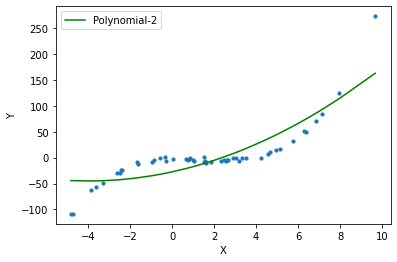

In [18]:
# Plotting polynomial degree 2 model
plt.scatter(x, y, s=10) 

# sort the values of x before plotting for polynomial line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_2_pred), key=sort_axis)
mod_x2, y_poly_2_pred = zip(*sorted_zip)
plt.plot(mod_x2, y_poly_2_pred, color="green" ,label="Polynomial-2")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

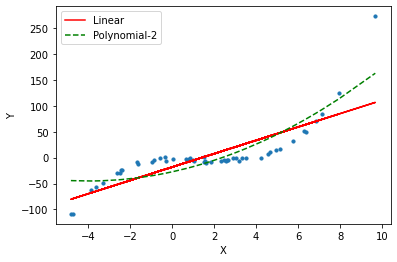

In [19]:
# Comparison with linear model  
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r',label="Linear")

plt.plot(mod_x2, y_poly_2_pred, "g--",label="Polynomial-2")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### Calculating SSE

In [20]:
# SSE
sum = 0   
n = len(x)  
for i in range (0,n):   
  diff = y[i] - y_poly_2_pred_temp[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
SSE_Poly_2 = round(sum,2)
print("Sum of Squared Error (SSE) for Polynomial degree 2 model:",SSE_Poly_2)

Sum of Squared Error (SSE) for Polynomial degree 2 model: 37989.36


##### Calculating R_2

In [21]:
# Calculating R-Squred value (goodness of model) using SSE
from sklearn.metrics import r2_score
out = r2_score(y,y_poly_2_pred_temp)
RS_Poly_2 = round(out,2)*100
print("R-Squred value for Linear model :",RS_Poly_2,"%")  

R-Squred value for Linear model : 74.0 %


Still, the polynomial with degree 2 did not fit the shape of the data points fully

### 3. Polynomial regression (degree 3)

##### Dataset

In [22]:
# Let us work with sample data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 50)

##### Data visualization

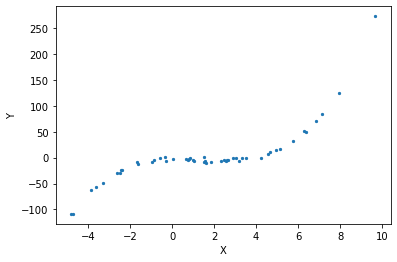

In [23]:
plt.scatter(x,y, s=5)
plt.xlabel("X")
plt.ylabel("Y") 
plt.show()

##### Fitting with polynomial order 3 using sklearn

In [24]:
import operator  
from sklearn.preprocessing import PolynomialFeatures

# To convert the original features into their higher order terms 
x = x.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

# Fit the polynomial model with degree 3
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [25]:
parameters = model.coef_
parameters

array([ 0.        ,  1.03253842, -2.02525278,  0.50272631])

In [26]:
print("a x_2 + b x + c => ", round(parameters[3],3)," x_3 +", round(parameters[3],2)," x_2 +",round(parameters[1],2)," x + ",round(parameters[0],2))

a x_2 + b x + c =>  0.503  x_3 + 0.5  x_2 + 1.03  x +  0.0


##### Predict the output for training input values using the model

In [27]:
y_poly_3_pred = model.predict(x_poly)
y_poly_3_pred_temp = y_poly_3_pred

##### Visualizting the prediction performance¶

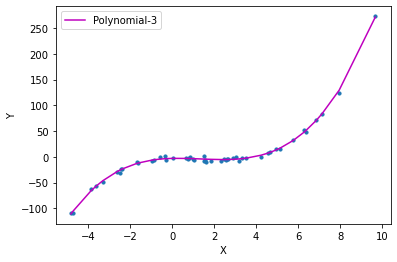

In [28]:
# Plotting polynomial degree 3 model
plt.scatter(x, y, s=10) 

# sort the values of x before plotting for polynomial line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_3_pred), key=sort_axis)
mod_x3, y_poly_3_pred = zip(*sorted_zip)
plt.plot(mod_x3, y_poly_3_pred, color='m',label="Polynomial-3")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

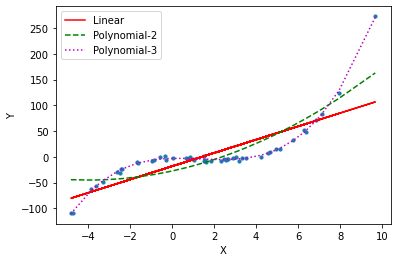

In [29]:
# Plotting linear, polynomial degree 2, and degree 3 models
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r',label="Linear")

plt.plot(mod_x2, y_poly_2_pred, "g--",label="Polynomial-2")
plt.plot(mod_x3, y_poly_3_pred, "m:",label="Polynomial-3")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### Calculating SSE

In [30]:
# SSE
sum = 0   
n = len(x)  
for i in range (0,n):   
  diff = y[i] - y_poly_3_pred_temp[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
SSE_Poly_3 = round(sum,2)
print("Sum of Squared Error (SSE) for Polynomial degree 3 model:",SSE_Poly_3)

Sum of Squared Error (SSE) for Polynomial degree 3 model: 335.37


##### Calculating R_2

In [31]:
# Calculating R-Squred value (goodness of model) using SSE
from sklearn.metrics import r2_score
out = r2_score(y, y_poly_3_pred_temp)
RS_Poly_3 = round(out,2)*100
print("R-Squred value for Linear model :",RS_Poly_3,"%")  

R-Squred value for Linear model : 100.0 %


### 4. Polynomial regression (degree 20)

##### Dataset

In [32]:
# Let us work with sample data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 50)

###### Data visualization

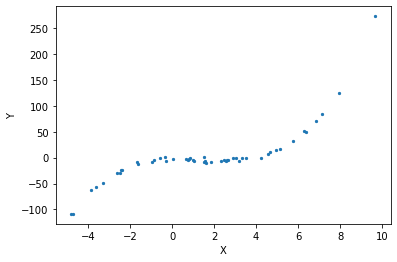

In [33]:
plt.scatter(x,y, s=5)
plt.xlabel("X")
plt.ylabel("Y") 
plt.show()

##### Fitting with polynomial order 20 using sklearn

In [34]:
import operator  
from sklearn.preprocessing import PolynomialFeatures

# To convert the original features into their higher order terms 
x = x.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=20)
x_poly = polynomial_features.fit_transform(x)

# Fit the polynomial model with degree 20
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [35]:
parameters = model.coef_
parameters

array([ 0.00000000e+00, -5.80638670e-06, -2.56142132e-07,  9.42812966e-08,
       -2.73251778e-06, -3.34809132e-07, -2.43337476e-05, -7.54489766e-06,
       -1.71053188e-04, -2.84858587e-05, -7.09124271e-04,  3.68238868e-04,
        4.14974138e-05, -4.81533446e-05,  4.22600515e-06,  1.82032258e-06,
       -3.64019229e-07, -3.75353258e-09,  6.52750301e-09, -6.24426594e-10,
        1.90018733e-11])

##### Predict the output for training input values using the model

In [36]:
y_poly_20_pred = model.predict(x_poly)
y_poly_20_pred_temp = y_poly_20_pred

##### Visualizting the prediction performance

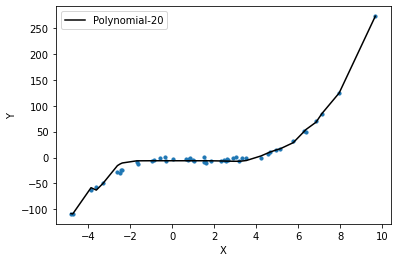

In [37]:
# Plotting polynomial degree 3 model
plt.scatter(x, y, s=10) 

# sort the values of x before plotting for polynomial line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_20_pred), key=sort_axis)
mod_x20, y_poly_20_pred = zip(*sorted_zip)
plt.plot(mod_x20, y_poly_20_pred, color='k',label="Polynomial-20")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

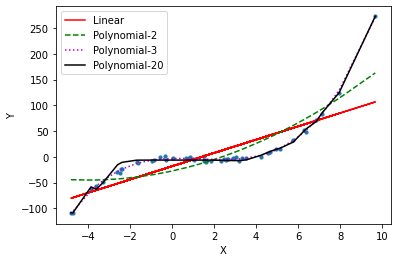

In [38]:
# Plotting linear, polynomial degree 2, and degree 3 models
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r',label="Linear")

plt.plot(mod_x2, y_poly_2_pred, "g--",label="Polynomial-2")
plt.plot(mod_x3, y_poly_3_pred, "m:",label="Polynomial-3")
plt.plot(mod_x20, y_poly_20_pred, "k-",label="Polynomial-20")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### Calculating SSE

In [39]:
# SSE
sum = 0   
n = len(x)  
for i in range (0,n):   
  diff = y[i] - y_poly_20_pred_temp[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
SSE_Poly_20 = round(sum,2)
print("Sum of Squared Error (SSE) for Polynomial degree 3 model:",SSE_Poly_20)

Sum of Squared Error (SSE) for Polynomial degree 3 model: 1412.95


##### Calculating R_2

In [40]:
# Calculating R-Squred value (goodness of model) using SSE
from sklearn.metrics import r2_score
out = r2_score(y, y_poly_20_pred_temp)
RS_Poly_20 = round(out,2)*100
print("R-Squred value for Linear model :",RS_Poly_20,"%")  

R-Squred value for Linear model : 99.0 %


### 5. Polynomial regression (degree 40)

##### Dataset

In [41]:
# Let us work with sample data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 50)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 50)

##### Data visualization

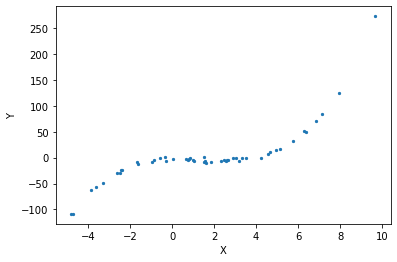

In [42]:
plt.scatter(x,y, s=5)
plt.xlabel("X")
plt.ylabel("Y") 
plt.show()

##### Fitting with polynomial order 40 using sklearn

In [43]:
import operator  
from sklearn.preprocessing import PolynomialFeatures

# To convert the original features into their higher order terms 
x = x.reshape(-1,1)
polynomial_features= PolynomialFeatures(degree=40)
x_poly = polynomial_features.fit_transform(x)

# Fit the polynomial model with degree 40
model = LinearRegression()
model.fit(x_poly, y)

LinearRegression()

In [44]:
parameters = model.coef_
parameters

array([ 1.15292548e-26,  4.88777058e-25,  3.85945961e-24,  3.54435807e-25,
       -4.08928460e-25,  1.65475277e-25,  8.57366583e-25,  1.08844480e-24,
        7.92905187e-25, -5.93122928e-24,  9.49131214e-24, -2.29010482e-23,
        4.24999279e-24,  1.10235548e-23,  7.10928913e-24,  3.65610125e-24,
       -8.35446452e-25,  1.73072959e-34,  9.13323554e-34,  4.55545820e-33,
        2.36155789e-32,  1.16598682e-31,  5.90240318e-31,  2.85966493e-30,
        1.40245942e-29,  6.59030802e-29,  3.09434467e-28,  1.38700206e-27,
        6.11562612e-27,  2.54621085e-26,  1.01825258e-25,  3.74879402e-25,
        1.26240557e-24,  3.66433533e-24,  8.26556952e-24,  1.19088838e-23,
       -9.47979847e-24,  2.50985511e-24, -3.17860822e-25,  1.97256739e-26,
       -4.83579243e-28])

##### Predict the output for training input values using the model

In [45]:
y_poly_40_pred = model.predict(x_poly)
y_poly_40_pred_temp = y_poly_40_pred

##### Visualizting the prediction performance

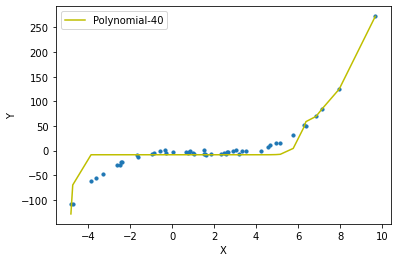

In [46]:
# Plotting polynomial degree 3 model
plt.scatter(x, y, s=10) 

# sort the values of x before plotting for polynomial line
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_40_pred), key=sort_axis)
mod_x40, y_poly_40_pred = zip(*sorted_zip)
plt.plot(mod_x40, y_poly_40_pred, color='y',label="Polynomial-40")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

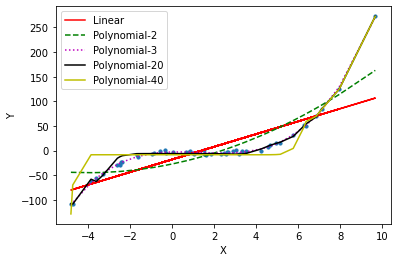

In [47]:
# Plotting linear, polynomial degree 2, and degree 3 models
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r',label="Linear")

plt.plot(mod_x2, y_poly_2_pred, "g--",label="Polynomial-2")
plt.plot(mod_x3, y_poly_3_pred, "m:",label="Polynomial-3")
plt.plot(mod_x20, y_poly_20_pred, "k-",label="Polynomial-20")
plt.plot(mod_x40, y_poly_40_pred, color='y',label="Polynomial-40")

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

##### Calculating SSE

In [48]:
# SSE
sum = 0   
n = len(x)  
for i in range (0,n):   
  diff = y[i] - y_poly_40_pred_temp[i]   
  squ_diff = diff**2   
  sum = sum + squ_diff   
SSE_Poly_40 = round(sum,2)
print("Sum of Squared Error (SSE) for Polynomial degree 3 model:",SSE_Poly_40)

Sum of Squared Error (SSE) for Polynomial degree 3 model: 13431.68


##### Calculating R_2

In [49]:
# Calculating R-Squred value (goodness of model) using SSE
from sklearn.metrics import r2_score
out = r2_score(y, y_poly_40_pred_temp)
RS_Poly_40 = round(out,2)*100
print("R-Squred value for Linear model :",RS_Poly_40,"%")  

R-Squred value for Linear model : 91.0 %


### Overall performance

In [50]:
print("Model   \t SSE              RS ")
print("======================================")
print("Linear   \t",SSE_Linear ,"\t", RS_Linear )
print("Poly_2   \t",SSE_Poly_2,"\t", RS_Poly_2)
print("Poly_3   \t",SSE_Poly_3,"\t", RS_Poly_3)
print("Poly_20  \t",SSE_Poly_20,"\t", RS_Poly_20)
print("Poly_40  \t",SSE_Poly_40,"\t", RS_Poly_40)

Model   	 SSE              RS 
Linear   	 50092.13 	 65.0
Poly_2   	 37989.36 	 74.0
Poly_3   	 335.37 	 100.0
Poly_20  	 1412.95 	 99.0
Poly_40  	 13431.68 	 91.0
